# Agrupar usuarios Twitter de acuerdo a su personalidad con K-means

Importando la librerías pandas, numpy, matplotlib, seaborn, sklearn y mpl_toolkits

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

Leer el dataset de usuarios de Twitter externamente, a través de estructura dataframe y mostrar las primeras 5 filas.

In [2]:
dataframe = pd.read_csv("/content/drive/MyDrive/Inteligencia Computacional/Aprendizaje No Supervisado/analisis.csv")
dataframe.head(5)

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


Obteniedno información estadística que nos provee Pandas.

In [3]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678867,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


El archivo contiene diferenciadas 9 categorías -actividades laborales- que son:

1.   Actor/actriz
2.   Cantante
3.   Modelo
4.   Tv, series
5.   Radio
6.   Tecnología
7.   Deportes
8.   Politica
9.   Escritor

Para saber cuantos registros tenemos de cada uno hacemos:

In [4]:
print(dataframe.groupby('categoria').size())


categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


De lo anterior, tenemos 34 cantantes, 27 actores, 17 deportistas, 16 políticos,etc.

#Visualizacion de datos

Eliminamos la etiqueta "categoria", esto para mostrar un histograma de la distribución de las caracteristicas o dimensiones.



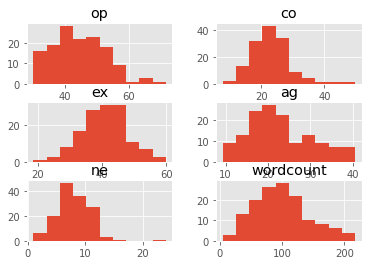

In [5]:
dataframe.drop(['categoria'],1).hist()
plt.show()

Seleccionaremos 3 dimensiones: op, ex y ag y las cruzamos para ver si nos dan alguna pista de su agrupación y la relación con sus categorías.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


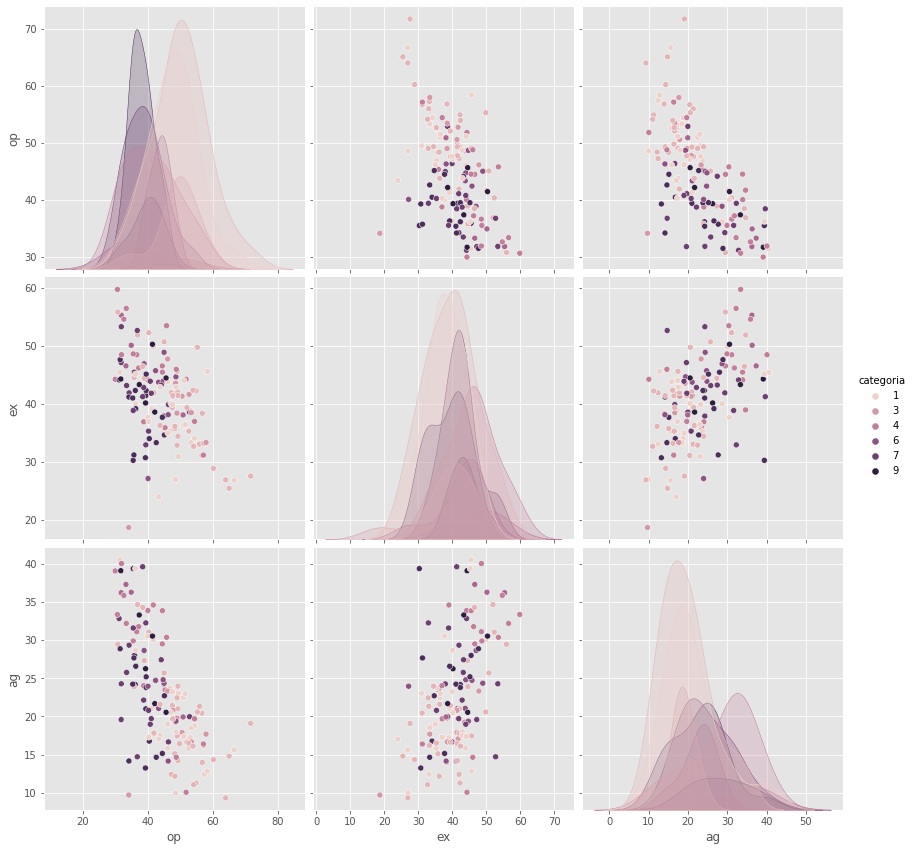

In [6]:
sb.pairplot(dataframe.dropna(), hue='categoria',size=4,vars=["op","ex","ag"],kind='scatter')

# Definimos la entrada

Solo utilizaremos las caracteristicas op, ex y ag en nuestra variable X.

In [7]:
X = np.array(dataframe[["op","ex","ag"]])
y = np.array(dataframe['categoria'])
X.shape

(140, 3)

A continuación, veremos una gráfica en 3D con 9 colores representando las categorías.

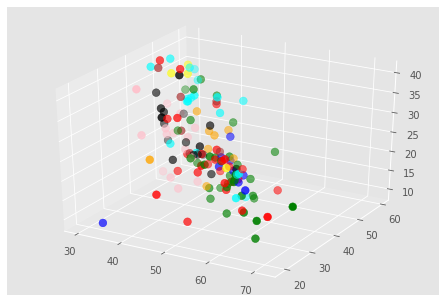

In [8]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

#Obtener el valor K

Vamos a hallar el valor de K haciendo una gráfica e intentar hallar nuestro “punto de codo". Este es nuestro resultado:

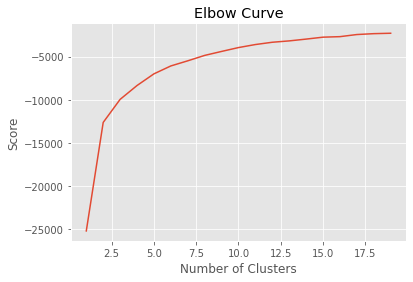

In [9]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

La curva es bastante “suave”. Tomares el valor de 5 como un buen número para K. Esto puede variar.

# Ejecutamos K-Means

Ejecutamos el algoritmo para 5 clusters y obtenemos las etiquetas y los centroids.

In [10]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[50.15530371 40.81295548 17.39048745]
 [35.43059843 47.36032979 34.68366068]
 [42.66891482 33.31008136 21.11530482]
 [39.39932548 44.72514645 24.44494482]
 [58.70462307 30.53566167 15.72207033]]


Ahora veremos esto en una gráfica 3D con colores para los grupos y veremos si se diferencian: (las estrellas marcan el centro de cada cluster)



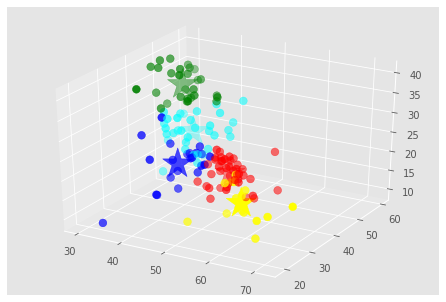

In [11]:
# Predecir los clústeres
labels = kmeans.predict(X)
# Obtener los centros de clúster
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

Aqui podemos ver que el Algoritmo de K-Means con K=5 ha agrupado a los 140 usuarios Twitter por su personalidad, teniendo en cuenta las 3 caracteristicas que utilizamos: Openess, Extraversion y Agreeablenes. 

Realizaremos 3 gráficas en 2 dimensiones con las proyecciones a partir de nuestra gráfica 3D para que nos ayude a visualizar los grupos y su clasificación:

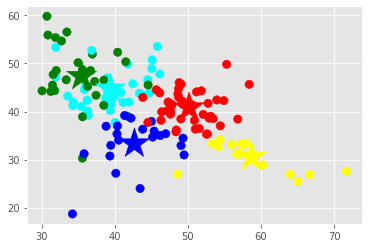

In [12]:
# Obtener los valores y graficarlos, en relacion a op y ex.
f1 = dataframe['op'].values
f2 = dataframe['ex'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

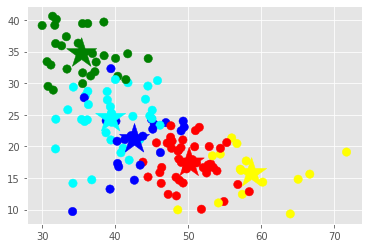

In [13]:
# Obtener los valores y graficarlos, en relacion a op y ag.
f1 = dataframe['op'].values
f2 = dataframe['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

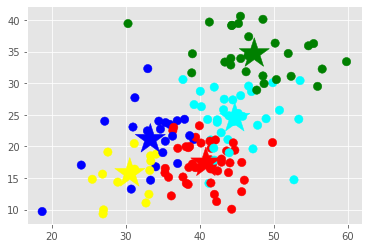

In [14]:
f1 = dataframe['ex'].values
f2 = dataframe['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

En estas gráficas vemos que se diferencian en 5 grupos.

In [15]:
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,42
1,green,28
2,blue,22
3,cyan,33
4,yellow,15


Y podemos ver la diversidad en rubros laborales de cada uno. Por ejemplo en el grupo 0 (rojo), vemos que hay de todas las actividades laborales aunque predominan de actividad 1 y 2 correspondiente a Actores y Cantantes con 11 y 15 famosos.

In [16]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,11.0
2,2,15.0
3,3,6.0
4,4,3.0
5,5,1.0
6,6,2.0
7,7,2.0
8,8,1.0
9,9,1.0


Buscaremos los usuarios que están más cerca a los centroids de cada grupo que podríamos decir que tienen los rasgos de personalidad característicos que representan a cada cluster.

In [17]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([ 21, 121,  91, 107,  82])

In [18]:
users=dataframe['usuario'].values
for row in closest:
    print(users[row])

carmenelectra
SerranoIsmael
kobebryant
Pablo_Iglesias_
JudgeJudy


# Clasificar nuevas muestras

Y finalmente podemos agrupar y etiquetar nuevos usuarios twitter con sus características y clasificarlos. Vemos el ejemplo con el usuario de David Guetta y nos devuelve que pertenece al grupo 4 (amarillo).

In [19]:
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta
 
new_labels = kmeans.predict(X_new)
print(new_labels)

[3]
